## <p style="font-family:verdana; font-weight:bold; letter-spacing: 2px; color:#000080; font-size:120%; text-align:left;padding: 0px; border-bottom: 3px solid #000080"> 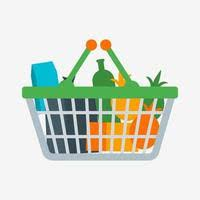🏗️ Grocery Sales Store in Ecuador</p>
<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFFFF; font-size:110%; text-align:left"> 

<h3 align="left"><font color='#000080'>💡 Project Objectives: Data Exploration & Visualization</font></h3>

* In this project, I will make data exploration & visualization for the sales of thousands of product families sold at many Favorita stores located in Ecuador. The dataset includes dates, stores and product family information, whether that item was being promoted, as well as the sales numbers.

* Additional files include supplementary information that may be useful in building the models.
The more detailed information is from Kaggle (https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data?select=train.csv)
    
<h3 align="left"><font color='#000080'>💡 Key Questions: </font></h3>
    
>   1. Location & store types in top sales over years 
    => Does the type & cluster of stores affect the store sales?
    => Does the location (city & state) of stores affect the store sales?

>   2. Product family & promotion in top sales over year  
    => Which product family with the highest sales?
    => Does Promotion has affection or improve the sales?

>   3. Time: which periods with peak - low sales   
    => weekend & salary days /end-first of months'affection

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "background-color:#0000FF;font-family:Georgia;color:#FFFFFF;font-size:200%;text-align:LEFT;border-radius:20px 40px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#0000FF;">📜 Table of Contents </h3>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="home" target="_self" style = "color:#0000FF; font-family:Charter;font-size:150%;">STEP 1 : Data Preparation & Undestanding <span class="badge badge-primary badge-pill">  </span></a>
            <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    DATA PREPARATION <span class="badge badge-primary badge-pill">  </span></a>
            <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    DATA UNDERSTANDING <span class="badge badge-primary badge-pill">  </span></a>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#0000FF; font-family:Charter;font-size:150%;">STEP 2 : Data Preprocessing & Exploratory Data Analysis (EDA)<span class="badge badge-primary badge-pill">  </span></a>
            <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    DATA PREPROCESSING <span class="badge badge-primary badge-pill">  </span></a>
            <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    DATA EXPLORATION <span class="badge badge-primary badge-pill">  </span></a>
    
</div>
</div>
</div>

<a id = "1"></a>
## <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000080; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #000080"> Step I - DATA PREPARATION & UNDERSTANDING</p></div>

<a id = "2"></a>
## <h2 align="center"><font color='006600'>  <b> ※ DATA PREPARATION </font></h2></b><br></div>

In [1]:
### Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
### Import dataset for analysis
train = pd.read_csv('train.csv')
holiday = pd.read_csv('holidays_events.csv')
transactions = pd.read_csv('transactions.csv')
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv')

<a id = "3"></a>
## <h2 align="center"><font color='006600'>  <b> ※ DATA UNDERSTANDING </font></h2></b><br></div>

#### > 💡💡💡 The order of data exploration   
    
After looking through dataset with 05 files, I come to decide that I will deal with these files in the **size/ complicated** priority order:
> <b> 1. Store     
> 2. Transaction     
> 3. Oil     
> 4. Holiday     
> 5. Train (the train file is quite big (3M rows)) </b>

#### > 💡💡💡 Function "str_to_date(data)" to transfer date column from str into date objects

Since the "date" column are strings and appear in many files **(transaction, oil, holiday, train)**, we write a function using pd.to_datetime to convert the 'date' column from strings to DateTime objects, ready for further analysis or visualization.

In [4]:
### Define a function in order to transfer date column from string into datetime and add time columns for further analysis
def str_to_date(df, col):
    
    df[col]= pd.to_datetime(df[col]) ### .dt.date  ### Important to keep .dt.date, helping to reduce the datatype if you face with memory issue
    df['Year'] = df[col].apply(lambda x: x.year)
    df['Month'] = df[col].apply(lambda x: x.month)
    
    df['Day'] = df[col].apply(lambda x: x.day)
    df['Year_month'] = df[col].apply(lambda x: x.to_period('M')) ## can not use with .dt.date
    
    df['Week_day'] = df[col].apply(lambda x: x.dayofweek)  ## other: x.weekday() with .dt.date
    maps = dict(zip(range(0,7), "Mon Tue Wed Thu Fri Sat Sun".split()))
    df['Week_day'] = df['Week_day'].map(maps)
    
    ### Note: run this code afterall
    df[col] = df[col].apply(lambda x: x.date()) # return a column for certain date in year - 2015-12-10
    
    return df

### 1. Stores file - "stores.csv'
+ Store metadata, including city, state, type, and cluster (a grouping of similar stores)

In [5]:
### Observe some initial data points
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [6]:
### We check the null values => No NULL values in this file
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [9]:
### Look more into the distribution of stores in state/cities in Ecuador
print(f"The number of stores as well as its uniqueness: {stores['store_nbr'].nunique()} stores.")
print(f"There're {stores['cluster'].nunique()} clusters, {stores['type'].nunique()} types, {stores['state'].nunique()} states, and {stores['city'].nunique()} cities in the file.")
### Look into the distribution of stores in type/cluster
stores_group = stores.groupby(['type'])['store_nbr'].count() #.sort_values( ascending = False)
stores_group

The number of stores as well as its uniqueness: 54 stores.
There're 17 clusters, 5 types, 16 states, and 22 cities in the file.


type
A     9
B     8
C    15
D    18
E     4
Name: store_nbr, dtype: int64

### 2. Transactions file - "transactions.csv"

include the date, the store and the number of transactions in that store for that day

In [10]:
### Check the transactions file & null values also
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [11]:
### Look at some initial rows in the dataset
transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

<div style="border-radius:10px; border:#006600 solid; padding: 15px; background-color: #FFFFFF; font-size:110%; text-align:left">   
💡 The transactions in each of 54 stores from 01.01.2013 to 15.08.2017:** 
04 years 7 months 15 days - Since there are some days without any transactions in certain stores, noted this point in order to deal with later when merging with TRAIN file.

In [12]:
### In order to merge data from different file, we create another date column - type string for later using, keeping date column for merging data LATER
transactions['date_str'] = transactions['date'].copy()
### Use the function str_to_date(df, col) to change str date into datetime for further visualizing data
transactions = str_to_date(transactions, col = 'date')
transactions.head()

date  store_nbr  transactions    date_str  Year  Month  Day  \
0  2013-01-01         25           770  2013-01-01  2013      1    1   
1  2013-01-02          1          2111  2013-01-02  2013      1    2   
2  2013-01-02          2          2358  2013-01-02  2013      1    2   
3  2013-01-02          3          3487  2013-01-02  2013      1    2   
4  2013-01-02          4          1922  2013-01-02  2013      1    2   

  Year_month Week_day  
0    2013-01      Tue  
1    2013-01      Wed  
2    2013-01      Wed  
3    2013-01      Wed  
4    2013-01      Wed

**Now, we display some chart for initial data understanding**

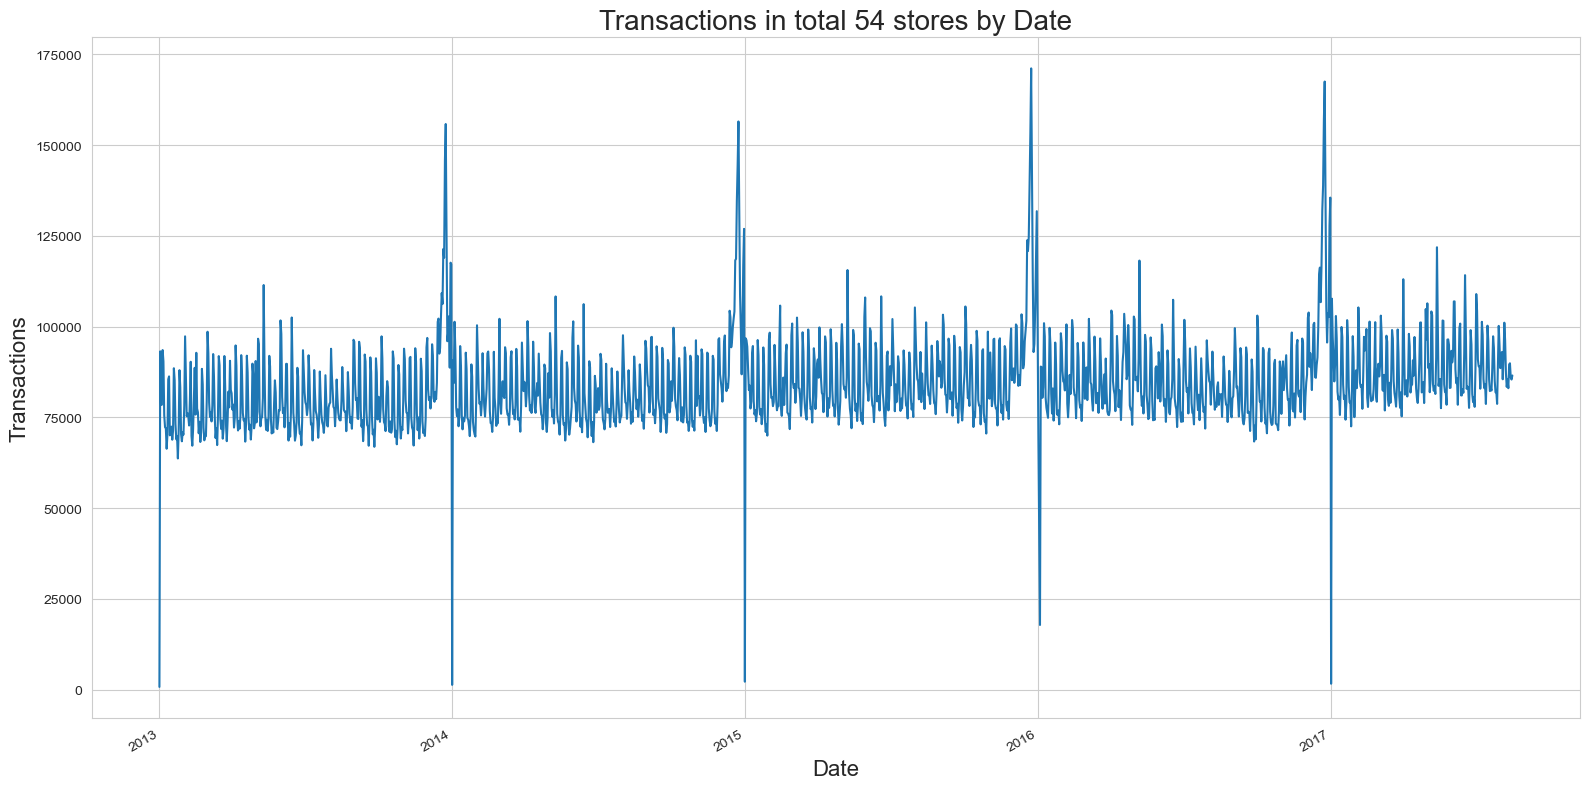

In [13]:
transaction_date = transactions.groupby(['date'])['transactions'].sum().reset_index()
### Plot the transaction trend over time from 01.01.2013 to 15.08.2017
plt.figure(figsize=(16,8))
plt.plot(transaction_date.date, transaction_date.transactions)

plt.title('Transactions in total 54 stores by Date', fontsize = 20)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Transactions', fontsize = 16)
plt.tight_layout()

In [14]:
### Here we check the number of transactions in the first date in every year, no figures for the date 2016-01-01
transaction_date[transaction_date.transactions < 60000].head(10)

date  transactions
0     2013-01-01           770
364   2014-01-01          1327
728   2015-01-01          2202
1093  2016-01-04         17829
1455  2017-01-01          1642

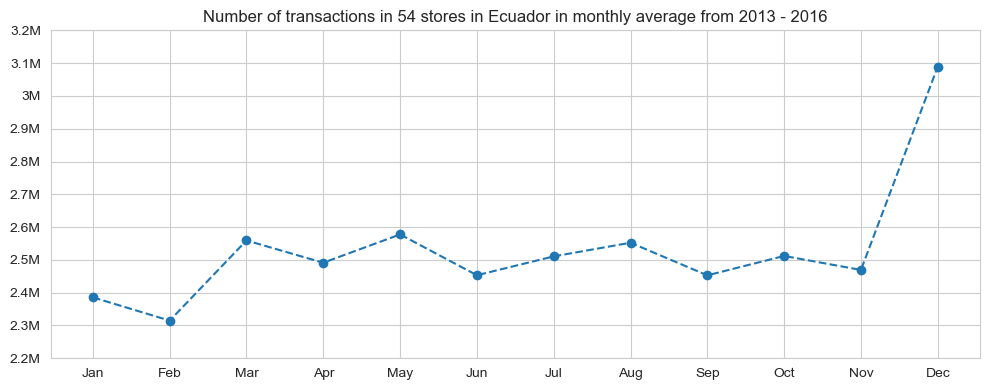

In [17]:
### In order to observer the pattern of sales over month in year, we need to remove the data in 2017, then group data in YEAR :
transaction_month = transactions[transactions.Year != 2017].groupby('Month')['transactions'].sum().reset_index()
transaction_month['monthly_transaction'] = transaction_month['transactions']/4 ### Calculate  the average transaction in months

### Visualize the data in Month-period:
plt.figure(figsize=(10,4))
transaction_month.monthly_transaction.plot(marker='o',title='Number of transactions in each Month',style='--')

plt.title('Number of transactions in 54 stores in Ecuador in monthly average from 2013 - 2016', fontsize = 24)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.yticks([2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000], ['2.2M','2.3M','2.4M','2.5M','2.6M','2.7M', '2.8M', '2.9M', '3M', '3.1M', '3.2M'])
#plt.legend(loc = 9)
plt.tight_layout()

### 3. Oil file - "oil.csv"

In [14]:
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [15]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


<div style="border-radius:10px; border:#006600 solid; padding: 15px; background-color: #FFFFFF; font-size:110%; text-align:left">   
    
**Notes:** The price of oil from 01.01.2013 upto 31.08.2017: 04 years, 8 months: (estimate 4 x 52 * 5days + (13 x 3) *5days - some holidays)

In [18]:
### We change the name of column for convenience
oil.rename(columns = {'dcoilwtico' : 'price_oil'}, inplace = True)

#### Now, we can make some graphs for oil price - initial data understanding

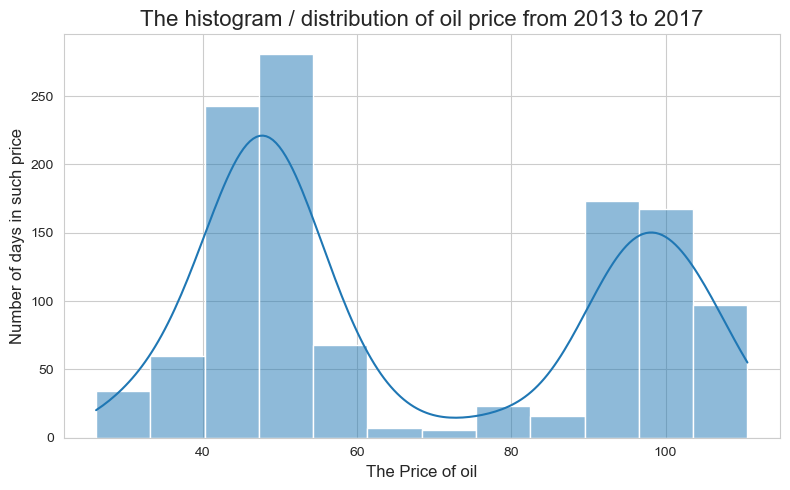

In [19]:
### We get the copy of oil file, make some graphs to have initial data understanding
oil_graphing = oil.copy()
### Use the function str_to_date(df, col) to change str date into datetime for further visualizing data
oil_graphing = str_to_date(oil_graphing, col = 'date')

### We check the histogram of oil price
plt.figure(figsize=(8,5))
sns.histplot(x='price_oil', data = oil_graphing, kde=True)

plt.title("The histogram / distribution of oil price from 2013 to 2017", fontsize=16)
plt.xlabel("The Price of oil", fontsize=12)
plt.ylabel("Number of days in such price", fontsize=12)
plt.tight_layout()

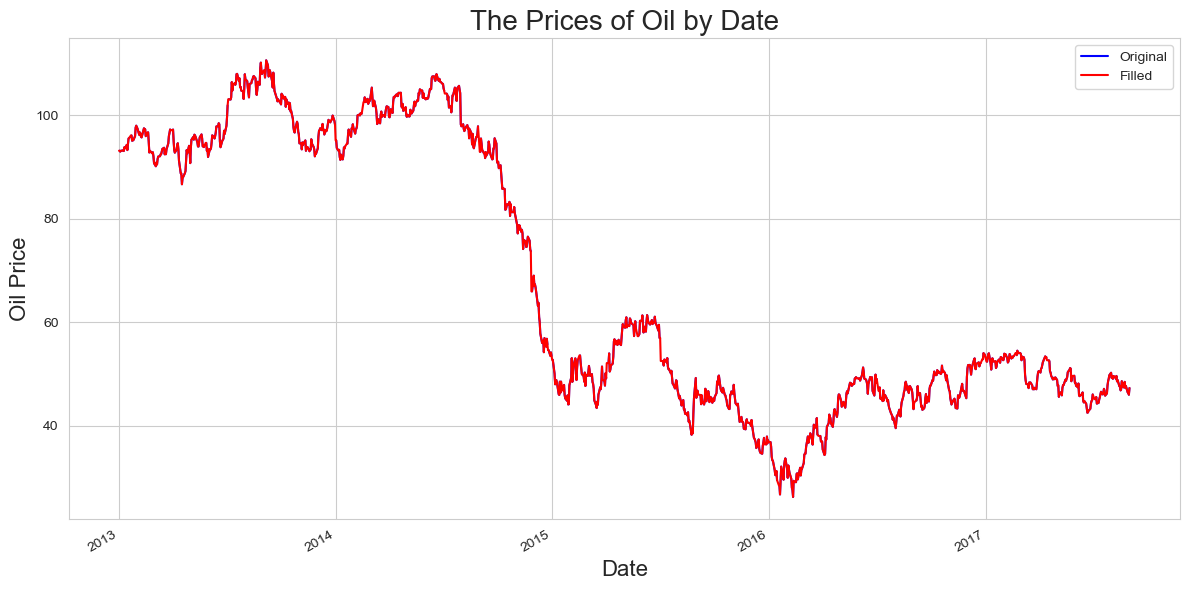

In [20]:
### Plot the oil price over time from 01.01.2013 to 31.08.2017
plt.figure(figsize=(12,6))
plt.plot(oil_graphing.date, oil_graphing.price_oil, color = 'blue', label='Original')  # oil['price_oil'].plot()

## Fill in the missing rows in OIL file using method = bfill
oil_graphing['price_oil'].fillna(method='bfill', inplace=True)

plt.plot(oil_graphing.date, oil_graphing.price_oil, color = 'red', label='Filled')

plt.title('The Prices of Oil by Date', fontsize = 20)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Oil Price', fontsize = 16)

plt.legend()
plt.tight_layout()

<div style="border-radius:10px; border:#006600 solid; padding: 15px; background-color: #FFFFFF; font-size:110%; text-align:left">   

#### 📊 Initial observation: 
Clearly, there were a sharp drop in oil price during the end of 2014 - start a new base price from the begining of 2015.
Again, a drop happened at the end of 2015 - early 2016, then a bounce up around mid of 2016.

**Now, we make some calculations on the oil price - with the oil file, make it ready for merging with TRAIN file**

In [21]:
## Again, fill in the missing rows in OIL file using method = bfill
oil['price_oil'].fillna(method='bfill', inplace=True)
### Calculate the price of oil for the previous day & different price
oil["previous_day"] = oil['price_oil'].shift()
# Once again, we fill the null values for the first row in previous_day column
oil['previous_day'].fillna(method='bfill', inplace=True)
### Get the difference in oil orice to see the fluctuation of oil market
oil['diff_price'] = oil['price_oil'] - oil['previous_day']

## THEN, check the null values before merging with other data
oil.info()
## NO NULL VALUES in this file NOW

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1218 non-null   object 
 1   price_oil     1218 non-null   float64
 2   previous_day  1218 non-null   float64
 3   diff_price    1218 non-null   float64
dtypes: float64(3), object(1)
memory usage: 38.2+ KB


### 4. Holiday file - 'holidays_events.csv'
Data from 2012 to 2017 with 350 rows and 6 columns

In [22]:
holiday.head(5)

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [23]:
### Check the holiday file & null values also
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [22]:
### Check the number of holiday types
print(f"Number of holiday types in the data: {holiday['type'].nunique()}.")
print(holiday['type'].value_counts())

### Check the types of holidays in the data
print(f"\nNumber of locale names in the data: {holiday['locale'].nunique()}.")
print(holiday['locale'].value_counts())

### Check the number of locale name types in the data
print(f"\nNumber of locale_name types in the data: {holiday['locale_name'].nunique()}.")
# holiday['locale_name'].value_counts()

print(f"Number of holidays being transferred - as normal days in the data: {holiday['transferred'].sum()}.")

Number of holiday types in the data: 6.
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

Number of locale names in the data: 3.
National    174
Local       152
Regional     24
Name: locale, dtype: int64

Number of locale_name types in the data: 24.
Number of holidays being transferred - as normal days in the data: 12.


#### 🧐🧐🧐 Look through the holiday file to explore and understand more


In [25]:
# A transferred day is more like a normal day than a holiday
# To find the day that it was actually celebrated, look for the corresponding row where type is Transfer.
holiday[((holiday['transferred']) | (holiday['type'] == "Transfer"))].head(5)

date      type    locale locale_name  \
19   2012-10-09   Holiday  National     Ecuador   
20   2012-10-12  Transfer  National     Ecuador   
72   2013-10-09   Holiday  National     Ecuador   
73   2013-10-11  Transfer  National     Ecuador   
135  2014-10-09   Holiday  National     Ecuador   

                             description  transferred  
19            Independencia de Guayaquil         True  
20   Traslado Independencia de Guayaquil        False  
72            Independencia de Guayaquil         True  
73   Traslado Independencia de Guayaquil        False  
135           Independencia de Guayaquil         True

In [26]:
### Check certain days with different types/labels to remove unnecessary rows before combining with Train file
days_typed = holiday['date'].value_counts()
print(f"Number of holidays if removing multiple types for one specific day in the file: {holiday['date'].nunique()} days.")
days_typed.head(5)

Number of holidays if removing multiple types for one specific day in the file: 312 days.


2014-06-25    4
2017-06-25    3
2016-06-25    3
2015-06-25    3
2013-06-25    3
Name: date, dtype: int64

In [27]:
## Get some examples to see the typs of holiday for one single day
holiday[ (holiday['date'] == '2014-06-25') | (holiday['date'] == "2013-06-25")]

date     type    locale locale_name  \
58   2013-06-25  Holiday  Regional    Imbabura   
59   2013-06-25  Holiday     Local     Machala   
60   2013-06-25  Holiday     Local   Latacunga   
110  2014-06-25  Holiday     Local   Latacunga   
111  2014-06-25  Holiday     Local     Machala   
112  2014-06-25  Holiday  Regional    Imbabura   
113  2014-06-25    Event  National     Ecuador   

                                   description  transferred  
58               Provincializacion de Imbabura        False  
59                        Fundacion de Machala        False  
60                  Cantonizacion de Latacunga        False  
110                 Cantonizacion de Latacunga        False  
111                       Fundacion de Machala        False  
112              Provincializacion de Imbabura        False  
113  Mundial de futbol Brasil: Ecuador-Francia        False

<div style="border-radius:10px; border:#006600 solid; padding: 15px; background-color: #FFFFFF; font-size:110%; text-align:left"> 
    
### 📊 brief EDA -  the Holiday file of the dataset:
- Dataset from 02.03.2012 to 26.12.2017, about 06 yrs with 350 rows and 06 columns:
- We have some days both marked as Bridge & Additional, resulting in dubplicate rows
- Also some days both marked as Event & Holiday, resulting in duplicate rows

=> There are actually 312 holidays

### 🧐 Some transfers in the type column :
Number of holiday types in the data: 6
+ Holiday       221  => change 12 days with 'Holiday'type & 'transferred' into 'Holiday-None'
+ Event          56  => change these days into 'Holiday' to remove duplicate rows, some days apear with both holiday & event
+ Additional     51  => change into 'Holiday-Extra'
+ Transfer       12  
+ Bridge          5  => change into 'Holiday-Extra' (Have some subplicte between Additional & Bridge day)
+ Work Day        5


In [3]:
## Retype the 'transferred' holiday as Holiday-None
holiday.loc[ holiday['transferred'],'type'] = 'Holiday-None'

## Retype the 'Bridge', 'Transfer' or 'Additional' as Holiday-Extra
holiday.loc[ (holiday['type'] == "Bridge") ,'type'] = 'Holiday'
holiday.loc[ (holiday['type'] == "Transfer") ,'type'] = 'Holiday'
holiday.loc[ (holiday['type'] == "Additional") ,'type'] = 'Holiday'

### This code is still not efficient: find the row with Event type, changing into Holiday type - in order to remove duplicates
holiday.loc[ (holiday['type'] == "Event") ,'type'] = 'Holiday'


<div style="border-radius:10px; border:#006600 solid; padding: 15px; background-color: #FFFFFF; font-size:110%; text-align:left">   
    
#### ☑️ Here we have the date - 12 Nov 2016 in the file marked as Work Day (National) & Holiday (Local)**

- 2016-11-12	Holiday	Local	Ambato	Independencia de Ambato	False
- 2016-11-12	Work Day	National	Ecuador	Recupero Puente Dia de Difuntos	False

to make it simple for further analysis, here we change this into Work Day as National day

In [4]:
holiday.loc[ (holiday['date'] == "2016-11-12") ,'type'] = 'Work Day'

In [5]:
## Change the name of 'type column'
holiday= holiday.rename(columns={'type': 'holiday_type'})
### Drop all unecessary columns ["transferred", 
holiday = holiday.drop(columns = ["transferred", "locale", "locale_name", "description"], axis = 1)

### Now we check again and drop duplicate rows 
print(f"Number of duplicated rows in the file: {sum(holiday.duplicated())} rows")

holiday = holiday.drop_duplicates()
print(f"From 350 rows, the holiday file now with {holiday.shape[0]} holidays, ready for combining with other files.")

### Also look again the type of holiday:
holiday['holiday_type'].value_counts()

Number of duplicated rows in the file: 38 rows
From 350 rows, the holiday file now with 312 holidays, ready for combining with other files.


Holiday         295
Holiday-None     12
Work Day          5
Name: holiday_type, dtype: int64

In [6]:
holiday.to_csv('Updated_holiday.csv')

### 5. train file - "train.csv"

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [33]:
train.head(5)

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [34]:
### Check for any missing values in train file
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

<div style="border-radius:10px; border:#006600 solid; padding: 15px; background-color: #FFFFFF; font-size:110%; text-align:left">   
    
### ☑️ Note: 
    a. train.csv => NO missing values
    b. holiday.csv => => NO missing values
    c. stores.csv => => NO missing values
    d. oil.csv => some null price values - already used bfill to deal with
    e. transactions.csv => NO missing value

In [43]:
### Check the uniqueness in the id column - Can set as PRIMARY KEY
print(f"Number of ID in the data: {train['id'].nunique()}.")

### Check the number of stores in the data
print(f"Number of stores in the data: {train['store_nbr'].nunique()}.")

### Check the number of product types in the data
print(f"Number of product types in the data: {train['family'].nunique()}.")

### onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.
# Check the number of promotion types in the data
print(f"Number of promotion with different items in the data: {train['onpromotion'].nunique()}.")
train['onpromotion'].value_counts(2).head(5)

Number of ID in the data: 3000888.
Number of stores in the data: 54.
Number of product types in the data: 33.
Number of promotion with different items in the data: 362.


0    0.796284
1    0.058166
2    0.026454
3    0.015283
4    0.010550
Name: onpromotion, dtype: float64

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Initial remarks from the train file of the dataset:</u></b><br>
    
* <i> Dataset from 01.01.2013 to 15.08.2017, about 4yrs 7months 15days (365*4+30*7+(4-2)+15+1 = 1688 days).</i><br>
* <i> Dataset has 3,000,888 rows with 06 columns: **id, date, store_nbr, family, sales, onpromotion**.</i><br>
* <i> There are 33 types of product in family and 54 stores.</i><br>
* <i> about 80% of the rows in TRAIN file with no promotion (onpromotion = 0).</i><br>

**Note:** Here we have 54 stores x 33 product types x 1,684 days = 3,000,888 rows in data (04 days may be missed in the dataset   
</div>

<a id = "4"></a>
### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000080; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #000080"> Step 2 - Data Preprocessing & Exploratory Data Analysis (EDA)</p>

<a id = "5"></a>
## <h2 align="center"><font color='006600'>  <b> ※ DATA PREPROCESSING </font></h2></b><br></div>
    

In [27]:
### Check the type of column 'date'
type(train['date'].iloc[0])  #type(train.date.iloc[0])

str

In [28]:
### In order to merge data from different file, we create another date column - type string for later using
train['date_str'] = train['date'].copy()

In [30]:
### Newxt, we transfer the date column into datetime type for further analysis
### With 3M rows, this code will take a long time (~ 3-5 minutes) to run
train = str_to_date(train, col='date')
train.head(5)

id        date  store_nbr      family  sales  onpromotion    date_str  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  2013-01-01   
1   1  2013-01-01          1   BABY CARE    0.0            0  2013-01-01   
2   2  2013-01-01          1      BEAUTY    0.0            0  2013-01-01   
3   3  2013-01-01          1   BEVERAGES    0.0            0  2013-01-01   
4   4  2013-01-01          1       BOOKS    0.0            0  2013-01-01   

   Year  Month  Day Year_month Week_day  
0  2013      1    1    2013-01      Tue  
1  2013      1    1    2013-01      Tue  
2  2013      1    1    2013-01      Tue  
3  2013      1    1    2013-01      Tue  
4  2013      1    1    2013-01      Tue

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
<h4 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "background-color:#FFFFFF;font-family:Georgia;color:#0000FF;font-size:120%;text-align:LEFT;border-radius:20px 40px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#0000FF;">📜 EDA for Answers </h4>
    
<a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    Total Sales By Dates <span class="badge badge-primary badge-pill">  </span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    Total Sales by Stores <span class="badge badge-primary badge-pill">  </span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#8" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    Promotion & stores <span class="badge badge-primary badge-pill">  </span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#9" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    Total Sales by Product Family <span class="badge badge-primary badge-pill">  </span></a>
    
</div>
</div>
</div>    

<a id = "6"></a>
<h3 align="left"><font color='#006600'> 📌 <b><u> Total Sales by dates:</font></h3></u></b><br>

**a) Total sales of all stores by dates - Time-series sales**

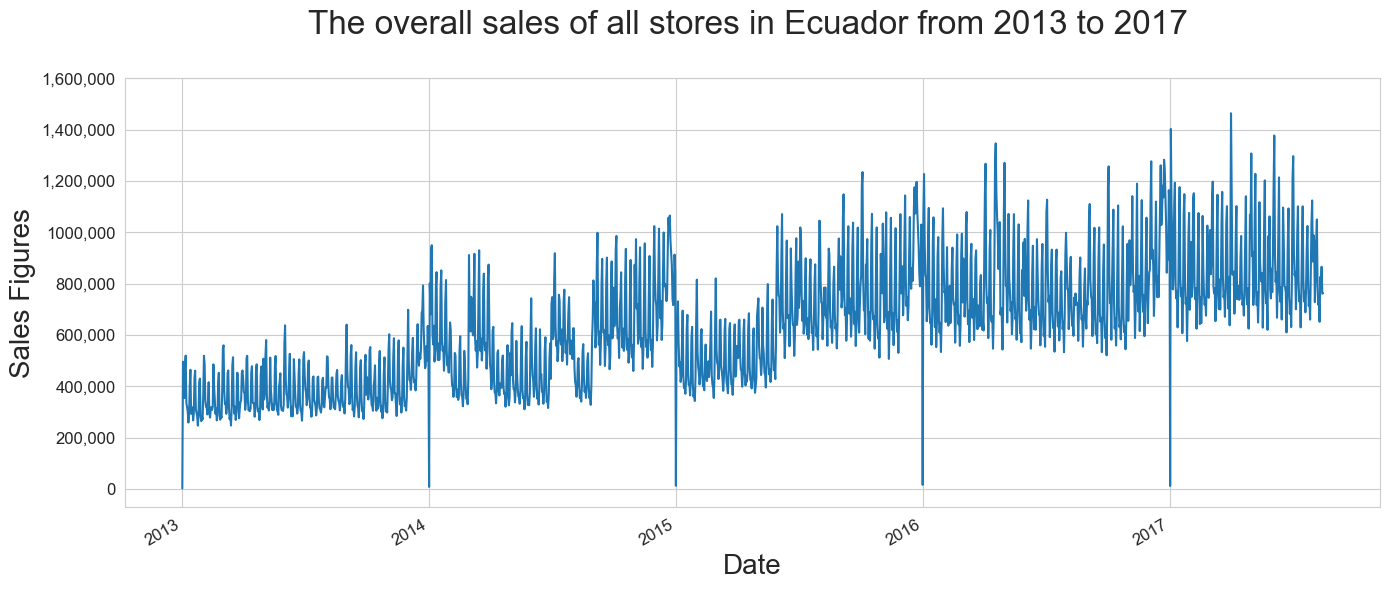

In [32]:
#store_date = train.groupby(['date', 'store_nbr'])
sales_date = train.groupby('date')['sales'].sum().reset_index()
### The sales number in the first date of every year
#sales_date[sales_date['sales'] < 200000].head(10)

### Plot the sales firgures over time to see the overall trend
plt.figure(figsize=(14,6))
plt.plot(sales_date.date, sales_date.sales)

plt.title('The overall sales of all stores in Ecuador from 2013 to 2017 \n', fontsize = 24)
plt.xticks(rotation=30, ha='right', fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Sales Figures', fontsize = 20)
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000], ['0', '200,000', '400,000', '600,000', '800,000', '1000,000', '1,200,000', '1,400,000', '1,600,000'])
plt.tight_layout()

**b) Sales average of certain store in one day**

In [33]:
# The sales number of each store in every date from 01.01.2013 to 15.07.2017
sales_store_date = train.groupby(['date_str', 'store_nbr'])['sales'].sum().reset_index()
sales_store_date['opened'] = sales_store_date['sales'].apply(lambda x: 0 if x == 0 else 1)
## This table can reuse when visualizing the monthly sales of each store over 2013-2017

## Here we calculate the average sales by day for one certain store
avgsales_date = sales_store_date.groupby('date_str')[['sales', 'opened']].sum().reset_index()
avgsales_date['avg_sales_date'] = avgsales_date['sales']/avgsales_date['opened']

avgsales_date['date'] = avgsales_date['date_str'].copy()
avgsales_date = str_to_date(avgsales_date, col='date')

avgsales_date.head()

date_str          sales  opened  avg_sales_date        date  Year  Month  \
0  2013-01-01    2511.618999       1     2511.618999  2013-01-01  2013      1   
1  2013-01-02  496092.417944      46    10784.617781  2013-01-02  2013      1   
2  2013-01-03  361461.231124      46     7857.852851  2013-01-03  2013      1   
3  2013-01-04  354459.677093      46     7705.645154  2013-01-04  2013      1   
4  2013-01-05  477350.121229      46    10377.176548  2013-01-05  2013      1   

   Day Year_month Week_day  
0    1    2013-01      Tue  
1    2    2013-01      Wed  
2    3    2013-01      Thu  
3    4    2013-01      Fri  
4    5    2013-01      Sat

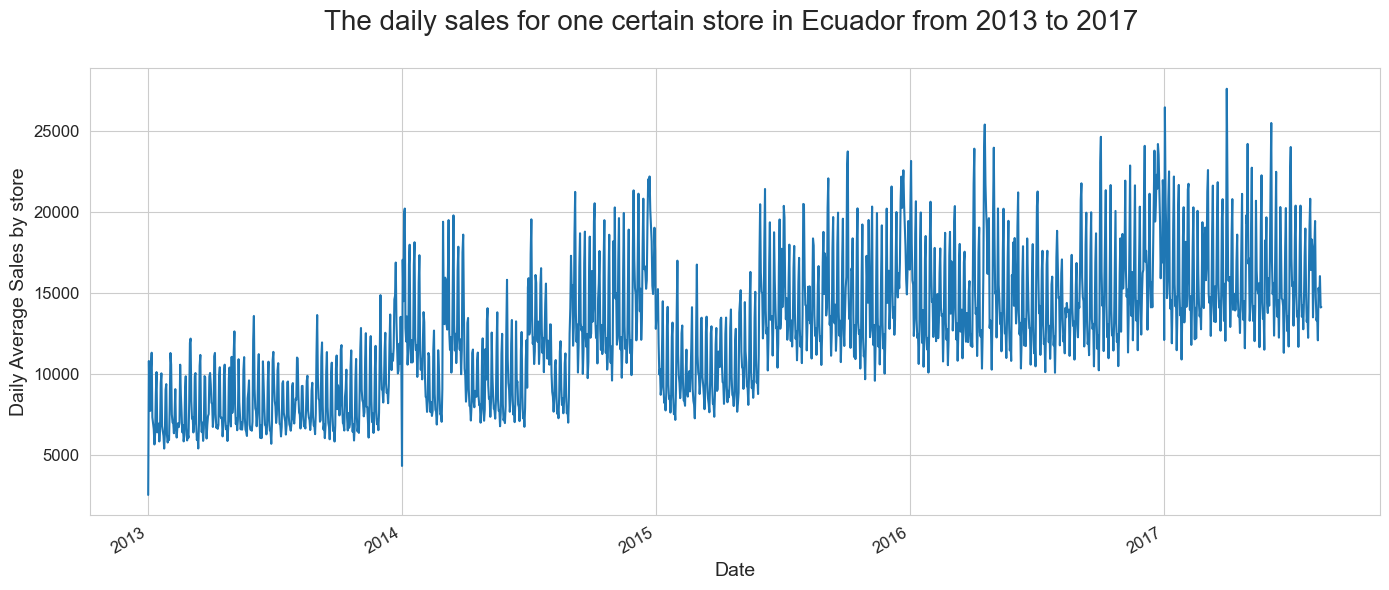

In [34]:
### Plot the average sales firgures by store over time to see the overall trend
plt.figure(figsize=(14,6))
plt.plot(avgsales_date.date, avgsales_date.avg_sales_date)

plt.title('The daily sales for one certain store in Ecuador from 2013 to 2017 \n', fontsize = 20)
plt.xticks(rotation=30, ha='right', fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Daily Average Sales by store', fontsize = 14)
plt.tight_layout()

**c) Sales average by day of week in certain store**

In [35]:
# The sales number of each store in week day from 01.01.2013 to 15.07.2017
avgsales_weekday = avgsales_date.groupby(['Week_day'])['avg_sales_date'].mean().reset_index()

map1 = dict(zip("Mon Tue Wed Thu Fri Sat Sun".split(), range(0,7)))
avgsales_weekday['Week_day'] = avgsales_weekday['Week_day'].map(map1)

avgsales_weekday = avgsales_weekday.sort_values(by='Week_day', ascending=True)
map2 = dict(zip(range(0,7), "Mon Tue Wed Thu Fri Sat Sun".split()))
avgsales_weekday['Week_day'] = avgsales_weekday['Week_day'].map(map2)

avgsales_weekday

Week_day  avg_sales_date
1      Mon    12258.072105
5      Tue    11316.742576
6      Wed    11783.378230
4      Thu    10080.598370
0      Fri    11561.183236
2      Sat    15334.775214
3      Sun    16439.432006

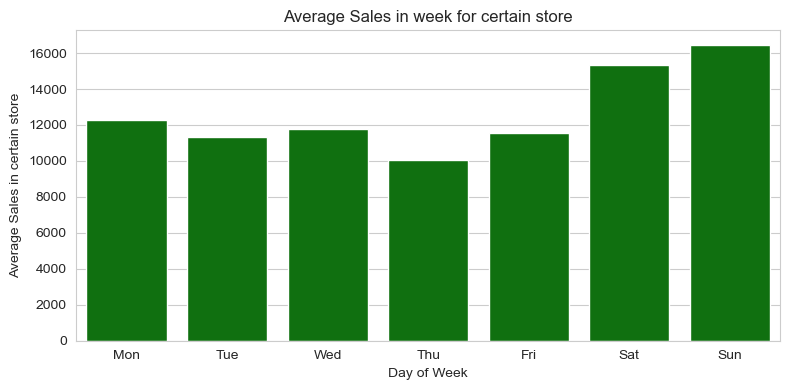

In [40]:
### Visualize the data in Month-period:
plt.figure(figsize=(8,4))
sns.barplot(data=avgsales_weekday, y='avg_sales_date', x='Week_day', color = 'green')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales in certain store')
#plt.yticks([8000,9000,10000,11000,12000,13000,14000,15000,16000,17000], ['8000','9000','10000','11000','12000','13000','14000','15000','16000','17000'])

plt.title('Average Sales in week for certain store')
plt.tight_layout()

**d) Sales average by day of month in certain store**

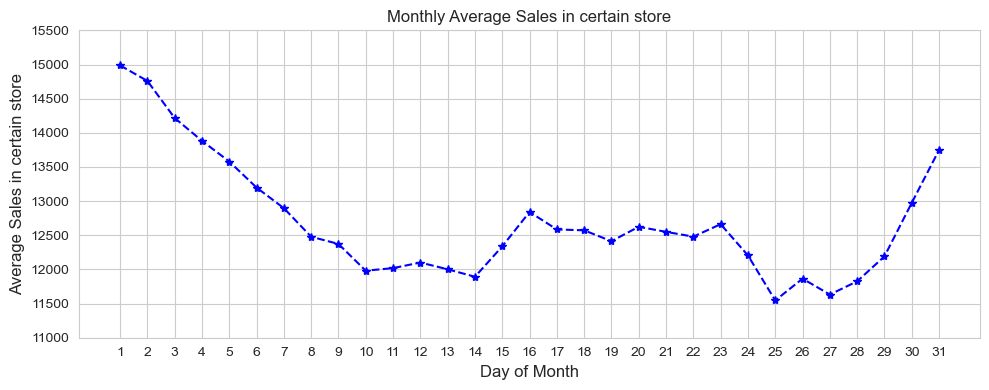

In [41]:
# The sales number of each store in week day from 01.01.2013 to 15.07.2017
avgsales_monthday = avgsales_date.groupby(['Day'])['avg_sales_date'].mean().reset_index()

### Visualize the data in Month-period:
plt.figure(figsize=(10,4))
avgsales_monthday['avg_sales_date'].plot(marker='*',title='Average Sales in Day of Month in certain store',color = 'blue', style='--')

plt.xlabel('Day of Month', fontsize = 12)
plt.ylabel('Average Sales in certain store', fontsize = 12)
plt.xticks(range(0,31,1), ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'])
plt.yticks([11000,11500,12000,12500,13000,13500,14000,14500,15000,15500], ['11000','11500','12000','12500','13000','13500','14000','14500','15000','15500'])

plt.tight_layout()

**e) Sales average by month of year in certain store**

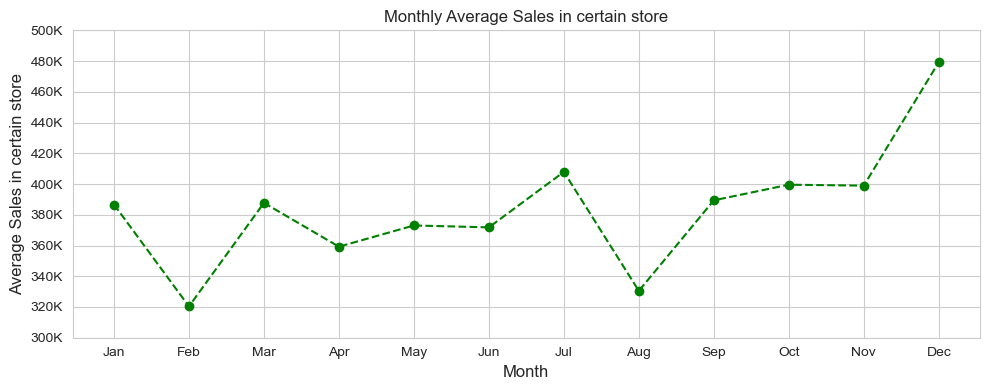

In [42]:
# The sales number of each store in month base from 01.01.2013 to 15.07.2017
## Since the data have some date with different store opening, we need to make the calculation thoroughly
avgsales_yearmonth = avgsales_date.groupby(['Year','Month'])['avg_sales_date'].sum().reset_index()
avgsales_month = avgsales_yearmonth.groupby(['Month'])['avg_sales_date'].mean().reset_index()

### Visualize the data in Month-period:
plt.figure(figsize=(10,4))
avgsales_month['avg_sales_date'].plot(marker='o',title='Monthly Average Sales in certain store',color = 'green', style='--')

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average Sales in certain store', fontsize = 12)
plt.yticks([300000,320000,340000,360000,380000,400000,420000,440000,460000,480000,500000], ['300K','320K','340K','360K','380K','400K','420K','440K','460K','480K','500K'])

plt.tight_layout()

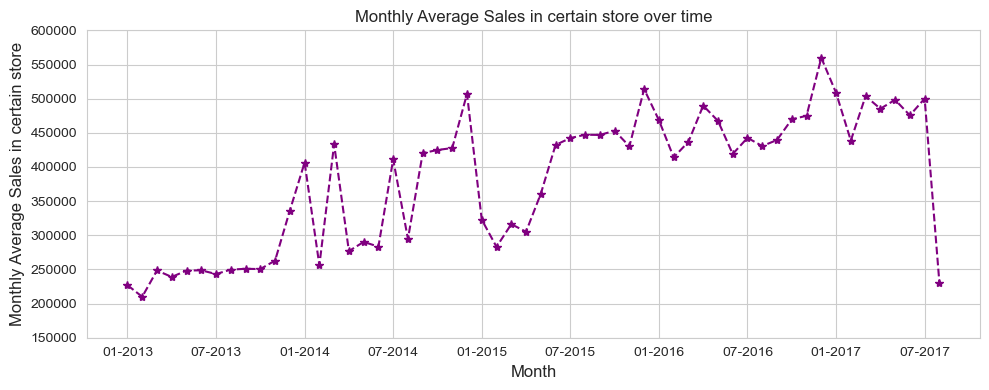

In [51]:
avgsales_yearmonth
### Visualize the data in Month-period:
plt.figure(figsize=(10,4))

avgsales_yearmonth['avg_sales_date'].plot(marker='*',title='Monthly Average Sales in certain store over time',color = 'purple', style='--')
plt.xlabel('Month', fontsize = 12)
plt.xticks([0,6, 12,18, 24,30, 36,42, 48,54], ['01-2013','07-2013','01-2014','07-2014','01-2015','07-2015','01-2016','07-2016','01-2017','07-2017'])
plt.ylabel('Monthly Average Sales in certain store', fontsize = 12)
plt.yticks([150000,200000,250000,300000,350000,400000,450000,500000,550000,600000], ['150000','200000','250000','300000','350000','400000','450000','500000','550000','600000'])

plt.tight_layout()
### Note - the sales figures in July 2017 just until 15.07, so the sales is low obviously

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Some key findings from sales visuals above:</u></b><br>
    
* <i> 1. The total sales had 2-3 times over 04 years from 2013 - 2017.</i><br>
* <i> 2. Sales are likely high during weekend, appx from 10k to 16k per day per store.</i><br>
* <i> 3. Some stores are usually closed at the first date of Year.</i><br>
* <i> 4. The sales are extremely high at the first days of the month, low in middle & lowest at nearly the 05th last days of month, but increased quickly back at the last days of the month.</i><br>
* <i> 5. The sales are highest in Dec and lowest in Feb & Aug.</i><br>
* <i> 6. In Year, the sales have increased continously, but got the sharp drop in the FIRST QUARTER of 2015.</i><br>    

</div>

### Now we combine the sales & transaction to see the change in sales value of each transaction over time

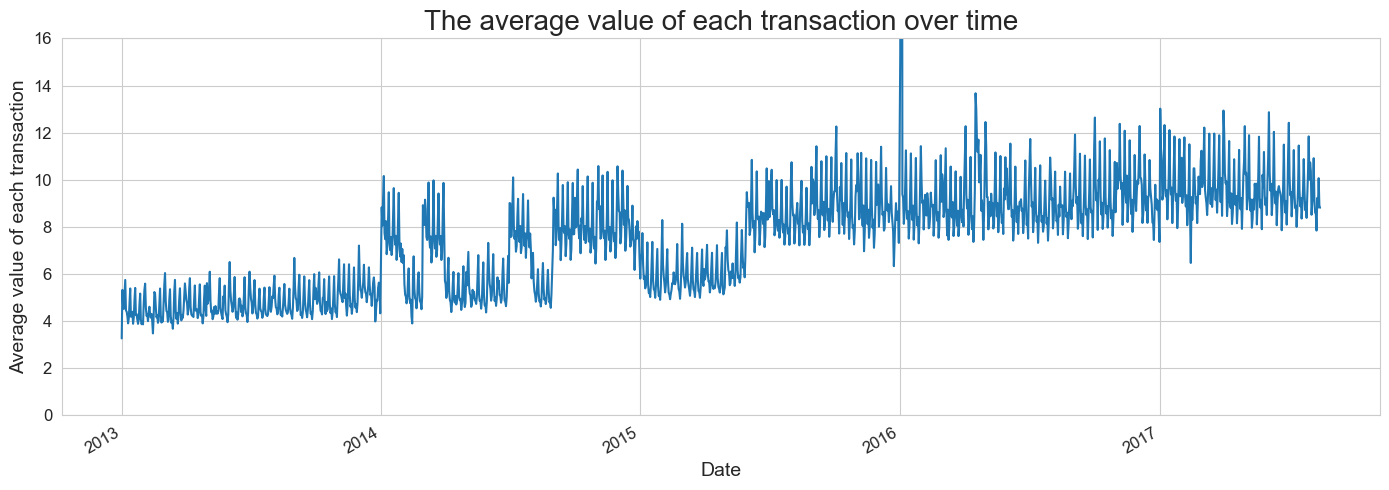

In [64]:
sales_transactions_date = pd.merge(sales_date, transaction_date, on = 'date')
sales_transactions_date['AvgValue_transaction'] = sales_transactions_date.sales / sales_transactions_date.transactions
### We can check the date with average value of transaction which was extremely high or extremely low
sales_transactions_date[sales_transactions_date['AvgValue_transaction'] > 16]

### Plot the average value in each transaction over time to see the overall trend
plt.figure(figsize=(14,5))

plt.plot(sales_transactions_date.date, sales_transactions_date['AvgValue_transaction'])

plt.title('The average value of each transaction over time', fontsize = 20)
plt.xticks(rotation=30, ha='right', fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Average value of each transaction', fontsize = 14)
plt.ylim(0, 16)
plt.tight_layout()

<a id = "7"></a>
<h3 align="left"><font color='#006600'> 📌📌 <b><u> Total Sales by stores:</font></h3></u></b><br>

here we can see which stores with the top 10 in total sales over years

In [45]:
### Here we merge (left join) the transactions file and stores file in to one store_trans
train = pd.merge(train, stores, on='store_nbr', how='left')
train.rename(columns = {'type' : 'store_type'}, inplace = True )
train.head(3)
# Now we use this file instead of the transactions & stores file

id        date  store_nbr      family  sales  onpromotion    date_str  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  2013-01-01   
1   1  2013-01-01          1   BABY CARE    0.0            0  2013-01-01   
2   2  2013-01-01          1      BEAUTY    0.0            0  2013-01-01   

   Year  Month  Day Year_month Week_day   city      state store_type  cluster  
0  2013      1    1    2013-01      Tue  Quito  Pichincha          D       13  
1  2013      1    1    2013-01      Tue  Quito  Pichincha          D       13  
2  2013      1    1    2013-01      Tue  Quito  Pichincha          D       13

### a) The overall of sales figures over 54 stores in 5 years

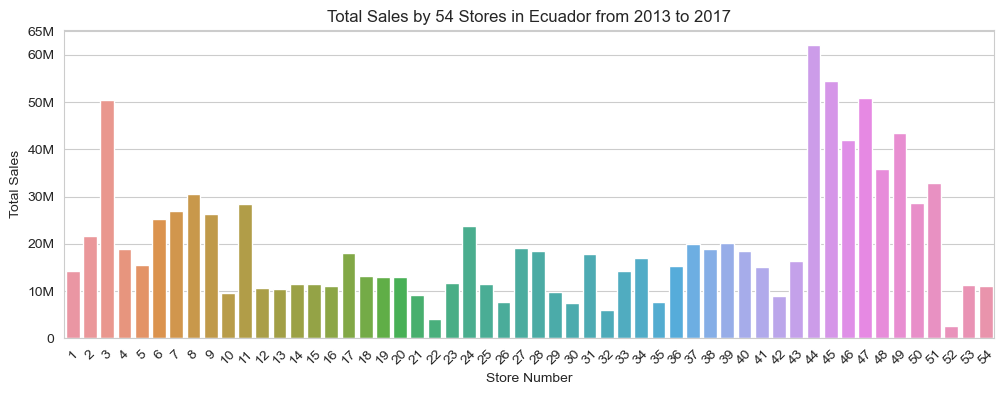

In [46]:
# Group the dataframe by store and sum the sales for each group
sales_by_store = train.groupby('store_nbr')['sales'].sum().reset_index()
# Sort the dataframe by sales in descending order
sales_by_store = sales_by_store.sort_values(by='sales', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 4))
sns.barplot(data=sales_by_store, x='store_nbr', y='sales')

plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales of 54 Stores in Ecuador from 2013 to 2017')
plt.xticks(rotation=45)
plt.yticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 65000000], ['0', '10M', '20M', '30M', '40M', '50M', '60M', '65M'])
plt.show()

### b) The sales figures of every store over year

In [55]:
### group the every year data by product_family, then sum the sales for each group
sales_store_year = train.groupby(['store_nbr', 'Year'])['sales'].sum().reset_index()
sales_store_year = sales_store_year.sort_values(by=['store_nbr', "Year"] , ascending=True)
sales_store_year

### Here we check the operation of stores over years
for y in range(2013, 2018) :
    opened_stores = sales_store_year[ ((sales_store_year.Year == y) & (sales_store_year.sales > 0)) ]['store_nbr'].count()
    print(f"Number of stores in {y}: {opened_stores} stores.", end ="")
    
    if opened_stores < 54:
        unopened_stores = sales_store_year[ ((sales_store_year.Year == y) & (sales_store_year.sales == 0)) ]['store_nbr']
        print(f"There are {unopened_stores.count()} stores still not opened in that year: ", end="")
        for i in range(len(unopened_stores)):
            print(unopened_stores.iloc[i], " ", end ="")
        print("\n")
    else: print(" Fully opened!!!")


Number of stores in 2013: 47 stores.There are 7 stores still not opened in that year: 20  21  22  29  42  52  53  

Number of stores in 2014: 48 stores.There are 6 stores still not opened in that year: 20  21  22  29  42  52  

Number of stores in 2015: 53 stores.There are 1 stores still not opened in that year: 52  

Number of stores in 2016: 53 stores.There are 1 stores still not opened in that year: 52  

Number of stores in 2017: 54 stores. Fully opened!!!


**Plot the relationship between stores and the type of stores \\ their clusters in each year**

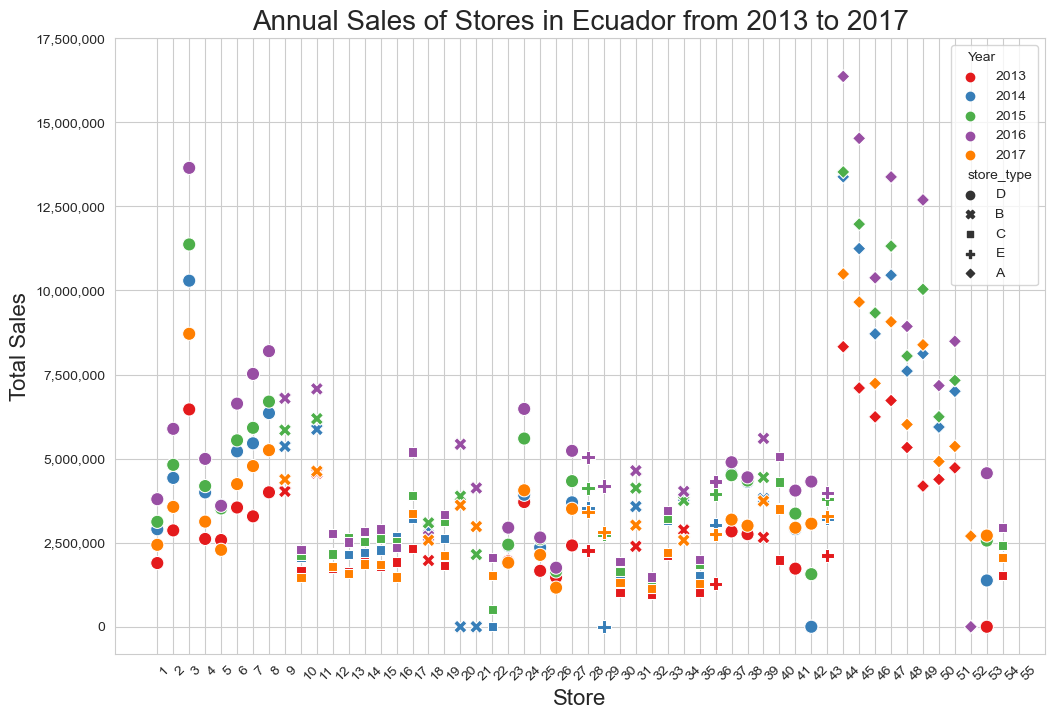

In [56]:
### We mege the sales store with stores data to visualize the sales trend in location:
sales_store_year = pd.merge(sales_store_year, stores, on='store_nbr', how='left')
sales_store_year.rename(columns = {'type' : 'store_type'}, inplace = True )

# PLot the sales & store_type & certain store for clearer observation
plt.figure(figsize=(12,8))
sns.scatterplot(x= 'store_nbr', y = 'sales', hue = 'Year', data = sales_store_year , s = 90, palette = 'Set1', style = 'store_type')

plt.xlabel('Store', fontsize = 16)
plt.ylabel('Total Sales', fontsize = 16)
plt.title('Annual Sales of Stores in Ecuador from 2013 to 2017', fontsize = 20)

plt.xticks(range(1,56,1), rotation = 45, ha ='left')
plt.yticks([0, 2500000, 5000000, 7500000, 10000000, 12500000, 15000000, 17500000], ['0', '2,500,000', '5,000,000', '7,500,000', '10,000,000', '12,500,000', '15,000,000', '17,500,000'])
plt.show()

<div style="border-radius:10px; border:#006600 solid; padding: 15px; background-color: #FFFFFF; font-size:110%; text-align:left">   

**Here we can observe that, there are not much difference in sales btw the type/clusters of stores, besides the stores in Type-A have obviously higher sales than the others.**
- We focus on the points in organge color for Year 2016 to observe the sales change, since the sales numbers in 2017 were just up to 15 July.

**Plot the relationship between city and stores \\ their clusters in each year**

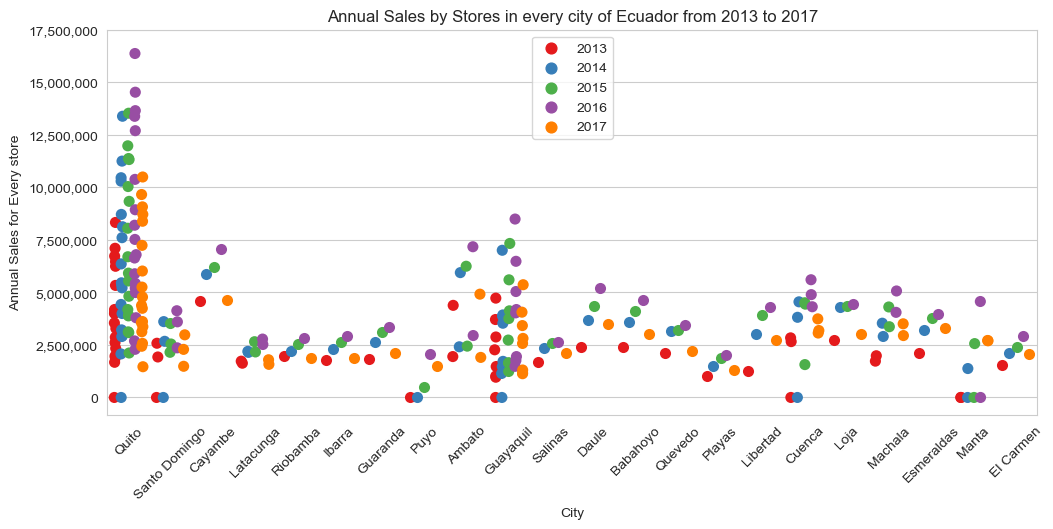

In [57]:

plt.figure(figsize=(12,5))
sns.stripplot(x= 'city', y = 'sales', hue = 'Year', data = sales_store_year , s = 8, palette = 'Set1', dodge = True)

plt.title('Annual Sales by Stores in every city of Ecuador from 2013 to 2017')
plt.ylabel('Annual Sales for Every store')
plt.xlabel('City')

plt.xticks(rotation=45)
#plt.xticks(range(0,18))
plt.yticks([0, 2500000, 5000000, 7500000, 10000000, 12500000, 15000000, 17500000], ['0', '2,500,000', '5,000,000', '7,500,000', '10,000,000', '12,500,000', '15,000,000', '17,500,000'])
plt.legend(loc = 9)
plt.show()

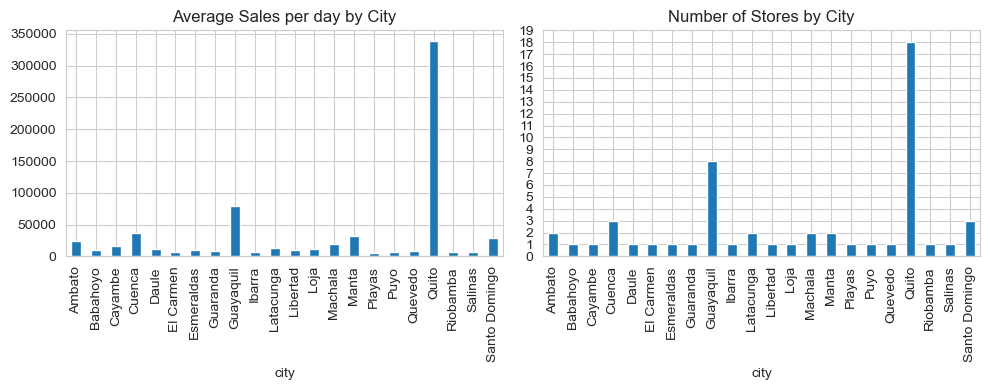

In [71]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,2,1)
dailysales_store.groupby(['city'])['avg_sales'].sum().plot(kind='bar')
#plt.yticks(range(0,350000,1))
plt.title('Average Sales per day by City')

ax2 = plt.subplot(1,2,2)
dailysales_store.groupby(['city'])['store_nbr'].nunique().plot(kind='bar')
plt.yticks(range(0,20,1))
plt.title('Number of Stores by City')
plt.tight_layout()

In [58]:
## REUSE the table with sales figures for each store everyday to plot the monthly sales of each store over year
sales_store_date['date'] = sales_store_date['date_str'].copy()
sales_store_date = str_to_date(sales_store_date, col='date')

### Calculate the average sales per day of each store
dailysales_store = sales_store_date.groupby(['store_nbr'])[['sales', 'opened']].sum().reset_index()
dailysales_store['avg_sales']=dailysales_store['sales'] / dailysales_store['opened']

### Here we merge the dailysales_store with file stores to get the info of certain store for further data visualization
dailysales_store = dailysales_store.merge(stores, on = 'store_nbr')
dailysales_store.head(3)

store_nbr         sales  opened     avg_sales   city      state type  \
0          1  1.414501e+07    1678   8429.685858  Quito  Pichincha    D   
1          2  2.155739e+07    1679  12839.421468  Quito  Pichincha    D   
2          3  5.048191e+07    1679  30066.652880  Quito  Pichincha    D   

   cluster  
0       13  
1       13  
2        8

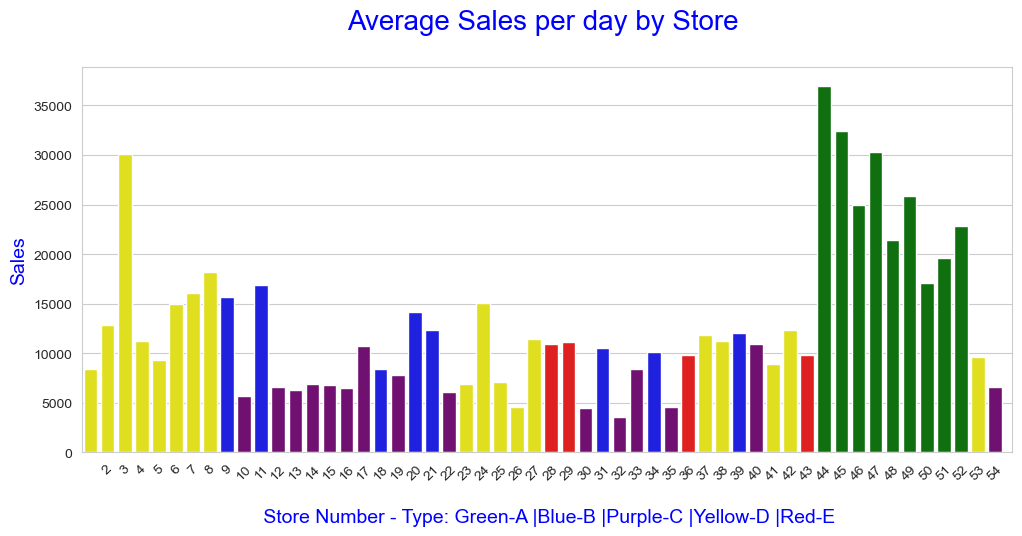

In [63]:
# Create a bar plot
plt.figure(figsize=(12, 5))
cols = ['green' if x == 'A' else 'blue' if x == 'B' else 'purple' if x=='C' else 'yellow' if x=='D' else 'red' for x in dailysales_store.type]
sns.barplot(data = dailysales_store, x='store_nbr', y='avg_sales', palette = cols)

plt.xlabel('\n Store Number - Type: Green-A |Blue-B |Purple-C |Yellow-D |Red-E',color = 'blue', fontsize = 14)
plt.ylabel('Sales', fontsize = 14, color = 'blue')
plt.title('Average Sales per day by Store \n', color = 'blue', fontsize = 20)
#plt.legend()
plt.xticks(range(1,55,1) ,rotation=45)
plt.show()

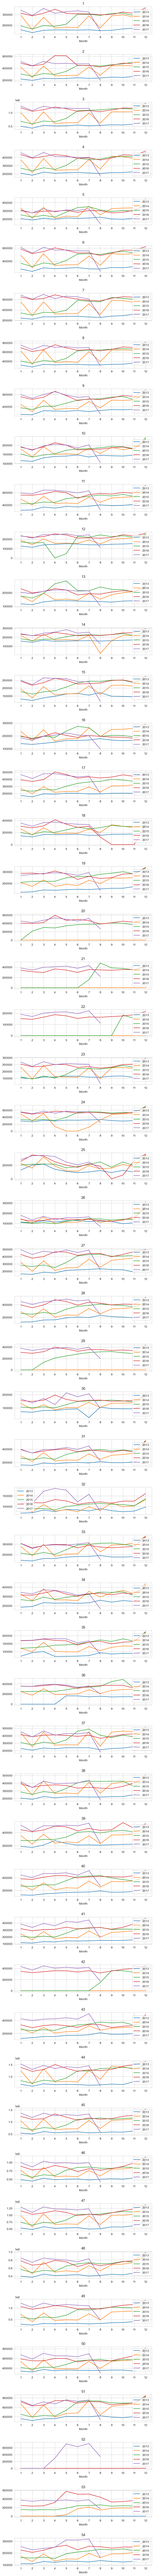

In [72]:
### for detail of sales in each store in month over 5 years
fig= plt.figure(figsize=(8,150))
fig.subplots_adjust(hspace=0.75)

for i, store in enumerate(sales_store_date.store_nbr.unique()):
    ax = fig.add_subplot(54,1,i+1)
    select = sales_store_date.query('store_nbr==@store')
    
    for year in [2013,2014,2015,2016,2017]: 
        select.query('Year==@year').groupby('Month').sales.sum().plot(ax=ax,label=year)
    plt.xticks(range(1,13,1))
    plt.title(store)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.legend();
    

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
     &nbsp;<b>📈 We can catagorize the product types into 04 groups - based on the monthly sales average:</u></b><br>

- Small : 1, 10, 12, 13, 14, 15, 16, 22, 23, 25, 26, 30, 32, 35, 5, 54
- Quite small : 17, 18, 19, 21, 28, 29, 31, 33, 34, 36, 37, 38, 39, 4, 40, 41, 42, 43, 53
- Medium : 11, 2, 20, 24, 27 , 48, 50, 51, 6, 7, 8, 9
- Large: 3, 44, 45, 46 , 47, 49, 51, 52

<a id = "8"></a>
<h3 align="left"><font color='#006600'> 📌📌📌 <b><u> The promotion program of stores:</font></h3></u></b><br>


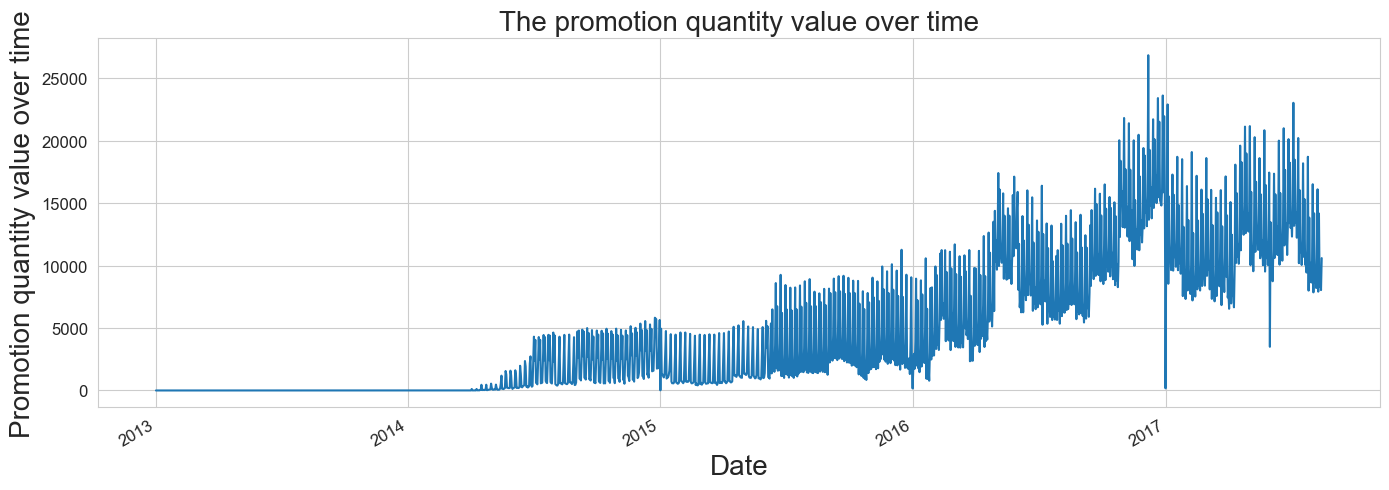

In [65]:
## First we group the data in store with promotion info
promotion_date = train.groupby('date')['onpromotion'].sum().reset_index()

### Plot the promotion quantity value over time to see the overall trend
plt.figure(figsize=(14,5))
plt.plot(promotion_date.date, promotion_date['onpromotion'] )

plt.title('The promotion quantity value over time', fontsize = 20)
plt.xticks(rotation=30, ha='right', fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Promotion quantity value over time', fontsize = 20)
#plt.ylim(0, 16)
plt.tight_layout()

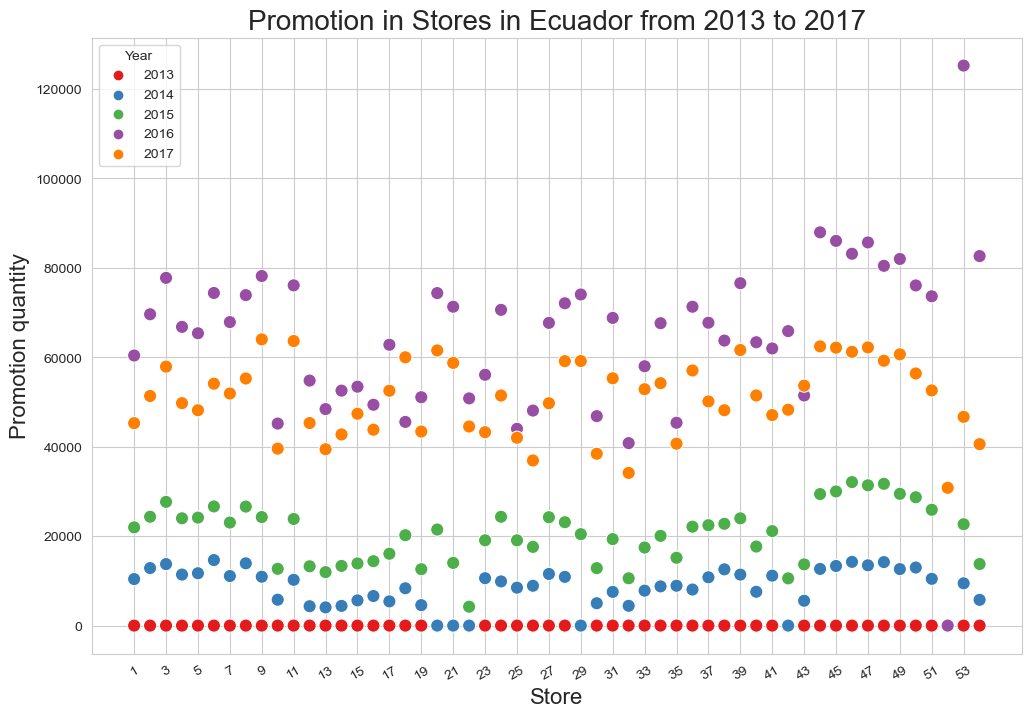

In [66]:
### group the every year data by product_family, then sum the sales for each group
promotion_store_year = train.groupby(['store_nbr', 'Year'])['onpromotion'].sum().reset_index()
promotion_store_year = promotion_store_year.sort_values(by=['store_nbr', "Year"] , ascending=True)

### We mege the sales store with stores data to visualize the sales trend in location:
promotion_store_year = pd.merge(promotion_store_year, stores, on='store_nbr', how='left')
promotion_store_year.rename(columns = {'type' : 'store_type'}, inplace = True )

# PLot the promotion & store_type
plt.figure(figsize=(12,8))
sns.scatterplot(x= 'store_nbr', y = 'onpromotion', hue = 'Year', data = promotion_store_year , s = 90, palette = 'Set1') #, style = 'store_type')

plt.xlabel('Store', fontsize = 16)
plt.ylabel('Promotion quantity', fontsize = 16)
plt.title('Promotion in Stores in Ecuador from 2013 to 2017', fontsize = 20)
plt.xticks(rotation=30)
plt.xticks(range(1,55,2))
#plt.yticks([0, 2500000, 5000000, 7500000, 10000000, 12500000, 15000000, 17500000], ['0', '2,500,000', '5,000,000', '7,500,000', '10,000,000', '12,500,000', '15,000,000', '17,500,000'])
plt.show()

### Otherwise, we want to check the promotion program of product types in overall

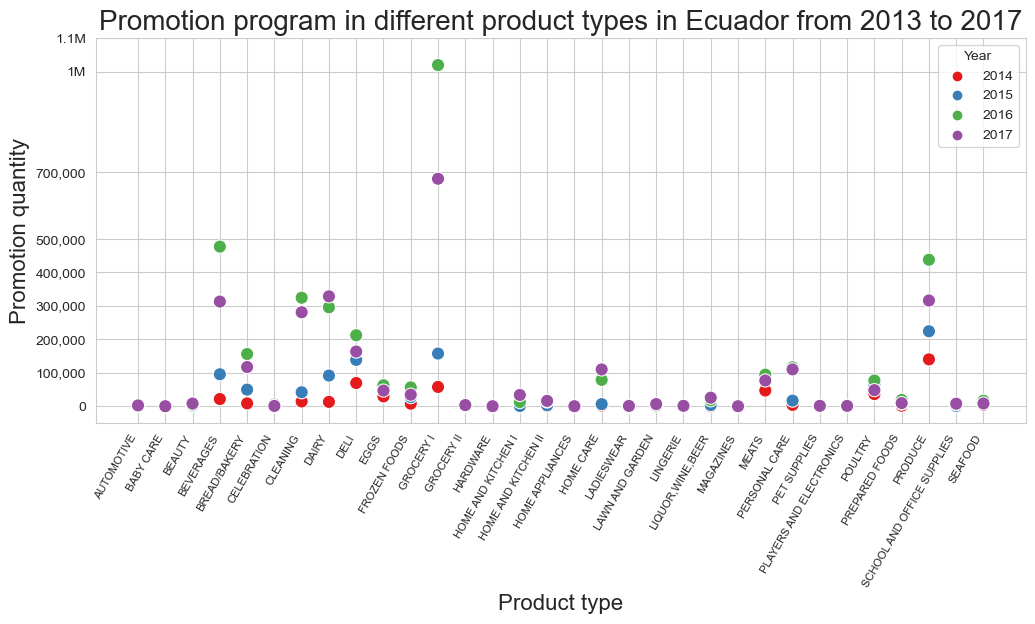

In [78]:
### group the every year data by product_family, then sum the sales for each group
promotion_product_year = train.groupby(['family', 'Year'])['onpromotion'].sum().reset_index()
promotion_product_year = promotion_product_year.sort_values(by=['family', "Year"] , ascending=True)

# PLot the promotion & store_type, since stores started the promotion from 01.04.2014, we just plot the chart from 2014-2017
plt.figure(figsize=(12,5))
sns.scatterplot(x= 'family', y = 'onpromotion', hue = 'Year', data = promotion_product_year[promotion_product_year.onpromotion > 0] , s = 90, palette = 'Set1') #, style = 'store_type')

plt.xlabel('Store', fontsize = 16)
plt.ylabel('Promotion quantity', fontsize = 16)
plt.title('Promotion program in different product types in Ecuador from 2013 to 2017', fontsize = 20)

plt.xlabel('Product type')
plt.xticks(rotation=60, ha='right', fontsize = 8)
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 700000, 1000000, 1100000], ['0','100,000','200,000','300,000','400,000','500,000','700,000', '1M', '1.1M'])
plt.show()

<a id = "9"></a>
<h3 align="left"><font color='#006600'> 📌📌📌📌 <b><u> Total Sales by product family:</font></h3></u></b><br>

Here we can analyse and get the top product type with highest sales over time

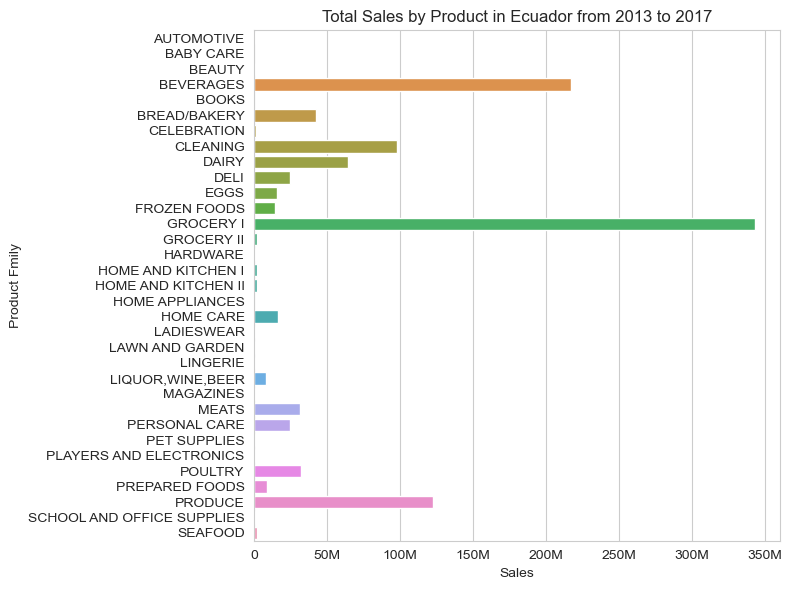

In [67]:
# Group the dataframe by product_family and sum the sales for each group
sales_by_family = train.groupby('family')['sales'].sum().reset_index()
# Sort the dataframe by sales in descending order
#sales_by_family = sales_by_family.sort_values(by='sales', ascending=False)

#### Plot the sales of every product type to have the overview of sales proportion 
plt.figure(figsize=(8,6))
# Create a horizontal bar chart of sales by product family
sns.barplot(x='sales', y='family', data = sales_by_family)

plt.xlabel('Sales')
plt.ylabel('Product Fmily')
plt.title('Total Sales by Product in Ecuador from 2013 to 2017')
plt.xticks([0, 50000000, 100000000, 150000000, 200000000, 250000000, 300000000, 350000000], ['0', '50M', '100M', '150M', '200M', '250M', '300M', '350M'])
plt.tight_layout()

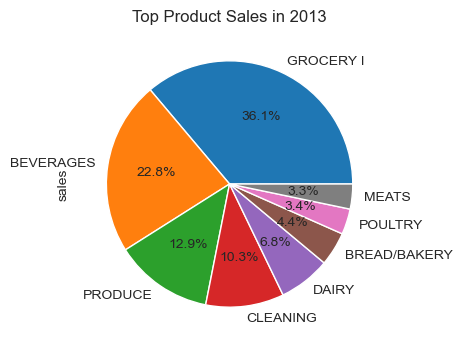

In [68]:
# Group the data by family and calculate the total sales for each family
family_sales = train.groupby('family')['sales'].sum()
family_sales = family_sales.sort_values(ascending=False)
# Get the top 8 families with the highest sales
top_product = family_sales.head(8)

# Create the pie chart
ax1 = top_product.plot(kind='pie', figsize=(4,4), fontsize=10, labels = top_product.index, autopct='%1.1f%%')
ax1.set_title('Top Product Sales', fontsize = 12)
plt.show()

### We create a new file by group product family and year to observe the sales trend of the product

In [88]:
## Create a table with sales figures for each product type everyday to plot the sales over store over month
sales_product_date = train.groupby(['date_str', 'family'])['sales'].sum().reset_index()
sales_product_date = str_to_date(sales_product_date, col = 'date_str')
sales_product_date.head()

date_str      family  sales  Year  Month  Day Year_month Week_day
0  2013-01-01  AUTOMOTIVE    0.0  2013      1    1    2013-01      Tue
1  2013-01-01   BABY CARE    0.0  2013      1    1    2013-01      Tue
2  2013-01-01      BEAUTY    2.0  2013      1    1    2013-01      Tue
3  2013-01-01   BEVERAGES  810.0  2013      1    1    2013-01      Tue
4  2013-01-01       BOOKS    0.0  2013      1    1    2013-01      Tue

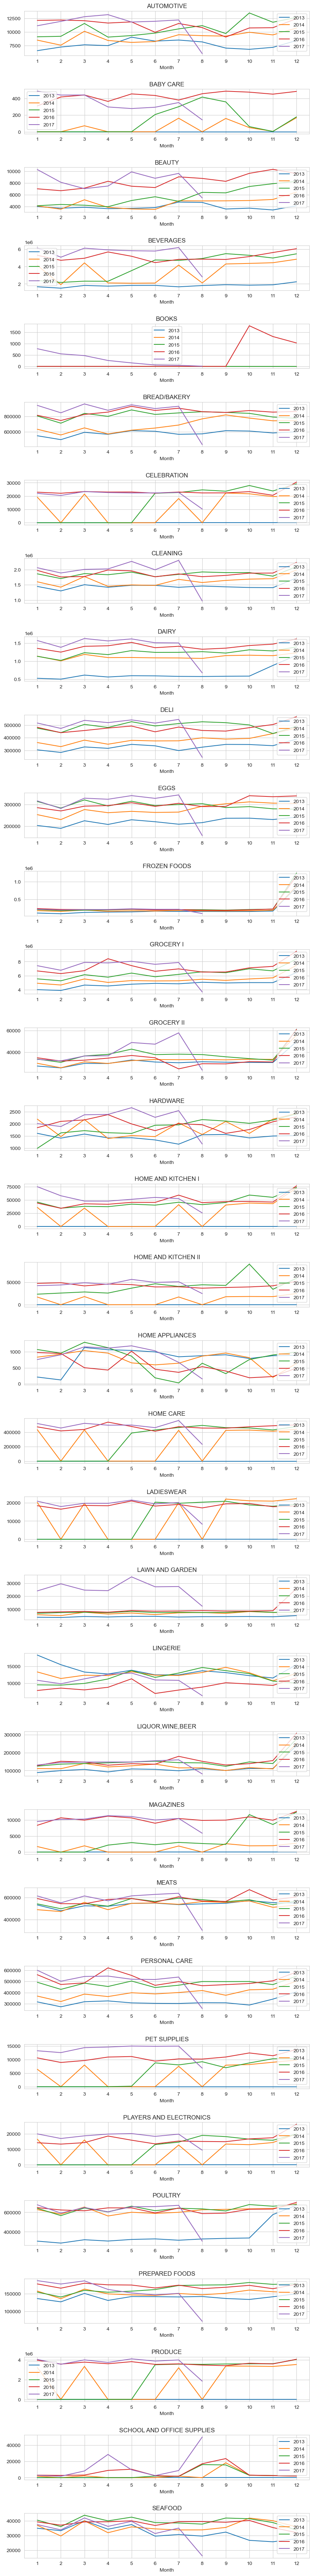

In [89]:
### Now we look into every product family over months in each year from 2013 to 2017 (about 5 years) to have some initial assumptions on the sales trend
## with 33 product family, it's hard to have a proper visual for sales evaluation
fig= plt.figure(figsize=(10,90))
fig.subplots_adjust(hspace=0.75)

for i, product in enumerate(sales_product_date.family.unique()):
    ax = fig.add_subplot(33,1,i+1)
    select = sales_product_date.query('family==@product')
    
    for year in [2013,2014,2015,2016,2017]: 
        select.query('Year==@year').groupby('Month').sales.sum().plot(ax=ax,label=year)
    plt.title(product)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(range(1,13,1))
    ax.legend();  

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Remarks:</u></b><br>
    
* <i> Here we can see the top product types over 5 years have not changed much.</i><br>
* <i> the **Grocery I** takes the largest proportion in sales number but reduring the share over years **(from 46% to 33%)**. Note, the sales figures are rising.</i><br>
* <i> Just in 2013 the stores didn't sell **Produce**, look more into the sales of this Produce product in 05 years, we can observe the  varies in sales 2014-2015, then got stable in 2016-2017.</i><br>
* <i> this pattern happened also in other product types: **Beverages, Ladieswear, Celebration, Home and kitchen I & II, Home Care, Ladieswear, Magazines, Pet Supplies, Players and Electronics.**</i><br>
* <i> **Frozen Foods**: have the sales pattern highly identical over years, with unvaried low sales over 11 months and got the peak sales in December (similar to **LIQUOR,WINE,BEER**).</i><br>
    
</div>

<div style="border-radius:10px; border:#006600 solid; padding: 15px; background-color: #FFFFFF; font-size:110%; text-align:left">   

#### > 📈 We can catagorize the product types into 04 groups:
- Extreme Low sales: Books (extremely low) , Beauty, Baby Care, Automotive, Celebration, HardWare, Home Appliances, Ladieswear, Lawn and Garden, Lingerie, Magazines, Pet Supplies, Players and Electronics, Seafood, School & office supplies
- Quite low sales: Prepared Foods, LIQUOR,WINE,BEER, Home and Kitchen I & II, Grocery II
- Normal : Personal Care, Home Care, Frozen Foods, eggs, deli
- Top sales: Grocery I, Produce, Dairy, Cleaning, Bread/Bakery, Beverages, Poultry, Meats

## <h3 align="left"><font color='006600'>  <b> In this data set, there are still a lot analytical issues/questions  in which we can go further. I temporarily keep them for further work in near future. Thanks much for your effort looking through my work. If you feel nice or useful ^_^, please support me with a vote  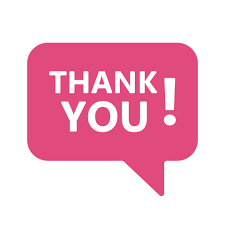 </font></h3></b><br></div>

In [ ]:
<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Some remarks from the CORRELATION GRAPH for further analysis:</b><br> 

* <i> 1. </i><br>
* <i> 2. </i><br>
* <i> 3. </i><br>
* <u> 4. </u><br>
    
</div>